In [1]:
import pandas as pd
import numpy as np

In [2]:
sp_20 = pd.read_csv("data/sao paulo 2020.csv")
sp_21 = pd.read_csv("data/sao paulo 2021.csv")
sp_22 = pd.read_csv("data/sao paulo 2022.csv")
sp_23 = pd.read_csv("data/sao paulo 2023.csv")
sp_24 = pd.read_csv("data/sao paulo 2024.csv")
sp_all = pd.read_csv("data/saopaulo_weather.csv")

sp_all.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,preciptype,windspeed,sealevelpressure,uvindex,name
0,2010-01-01,75.0,68.0,70.9,89.8,0.157,100,8.33,rain,10.8,1014.2,8.0,sao paulo
1,2010-01-02,82.2,68.0,72.4,88.6,2.363,100,12.50,rain,7.9,1016.4,8.0,sao paulo
2,2010-01-03,84.6,71.3,76.1,81.0,0.000,0,0.00,NaN,12.4,1018.3,8.0,sao paulo
3,2010-01-04,87.7,71.2,75.9,77.7,0.780,100,8.33,rain,12.4,1018.1,5.0,sao paulo
4,2010-01-05,87.8,69.8,77.0,76.6,0.709,100,4.17,rain,11.2,1015.0,6.0,sao paulo


In [3]:
merged_df = pd.concat([sp_all, sp_20, sp_21, sp_22, sp_23, sp_24], ignore_index=True)
merged_df.to_csv("data/merged_weather.csv", index=False)
merged_all = pd.read_csv("data/merged_weather.csv")
merged_all["datetime"] = pd.to_datetime(merged_all["datetime"])
merged_all.head()

,datetime,tempmax,tempmin,temp,humidity,precip,precipprob,precipcover,preciptype,windspeed,sealevelpressure,uvindex,name
0,2010-01-01,75.0,68.0,70.9,89.8,0.157,100,8.33,rain,10.8,1014.2,8.0,sao paulo
1,2010-01-02,82.2,68.0,72.4,88.6,2.363,100,12.50,rain,7.9,1016.4,8.0,sao paulo
2,2010-01-03,84.6,71.3,76.1,81.0,0.000,0,0.00,NaN,12.4,1018.3,8.0,sao paulo
3,2010-01-04,87.7,71.2,75.9,77.7,0.780,100,8.33,rain,12.4,1018.1,5.0,sao paulo
4,2010-01-05,87.8,69.8,77.0,76.6,0.709,100,4.17,rain,11.2,1015.0,6.0,sao paulo


In [4]:
# given time series data on weather, price determine if there is relationship between both 
import matplotlib.pyplot as plt
import math

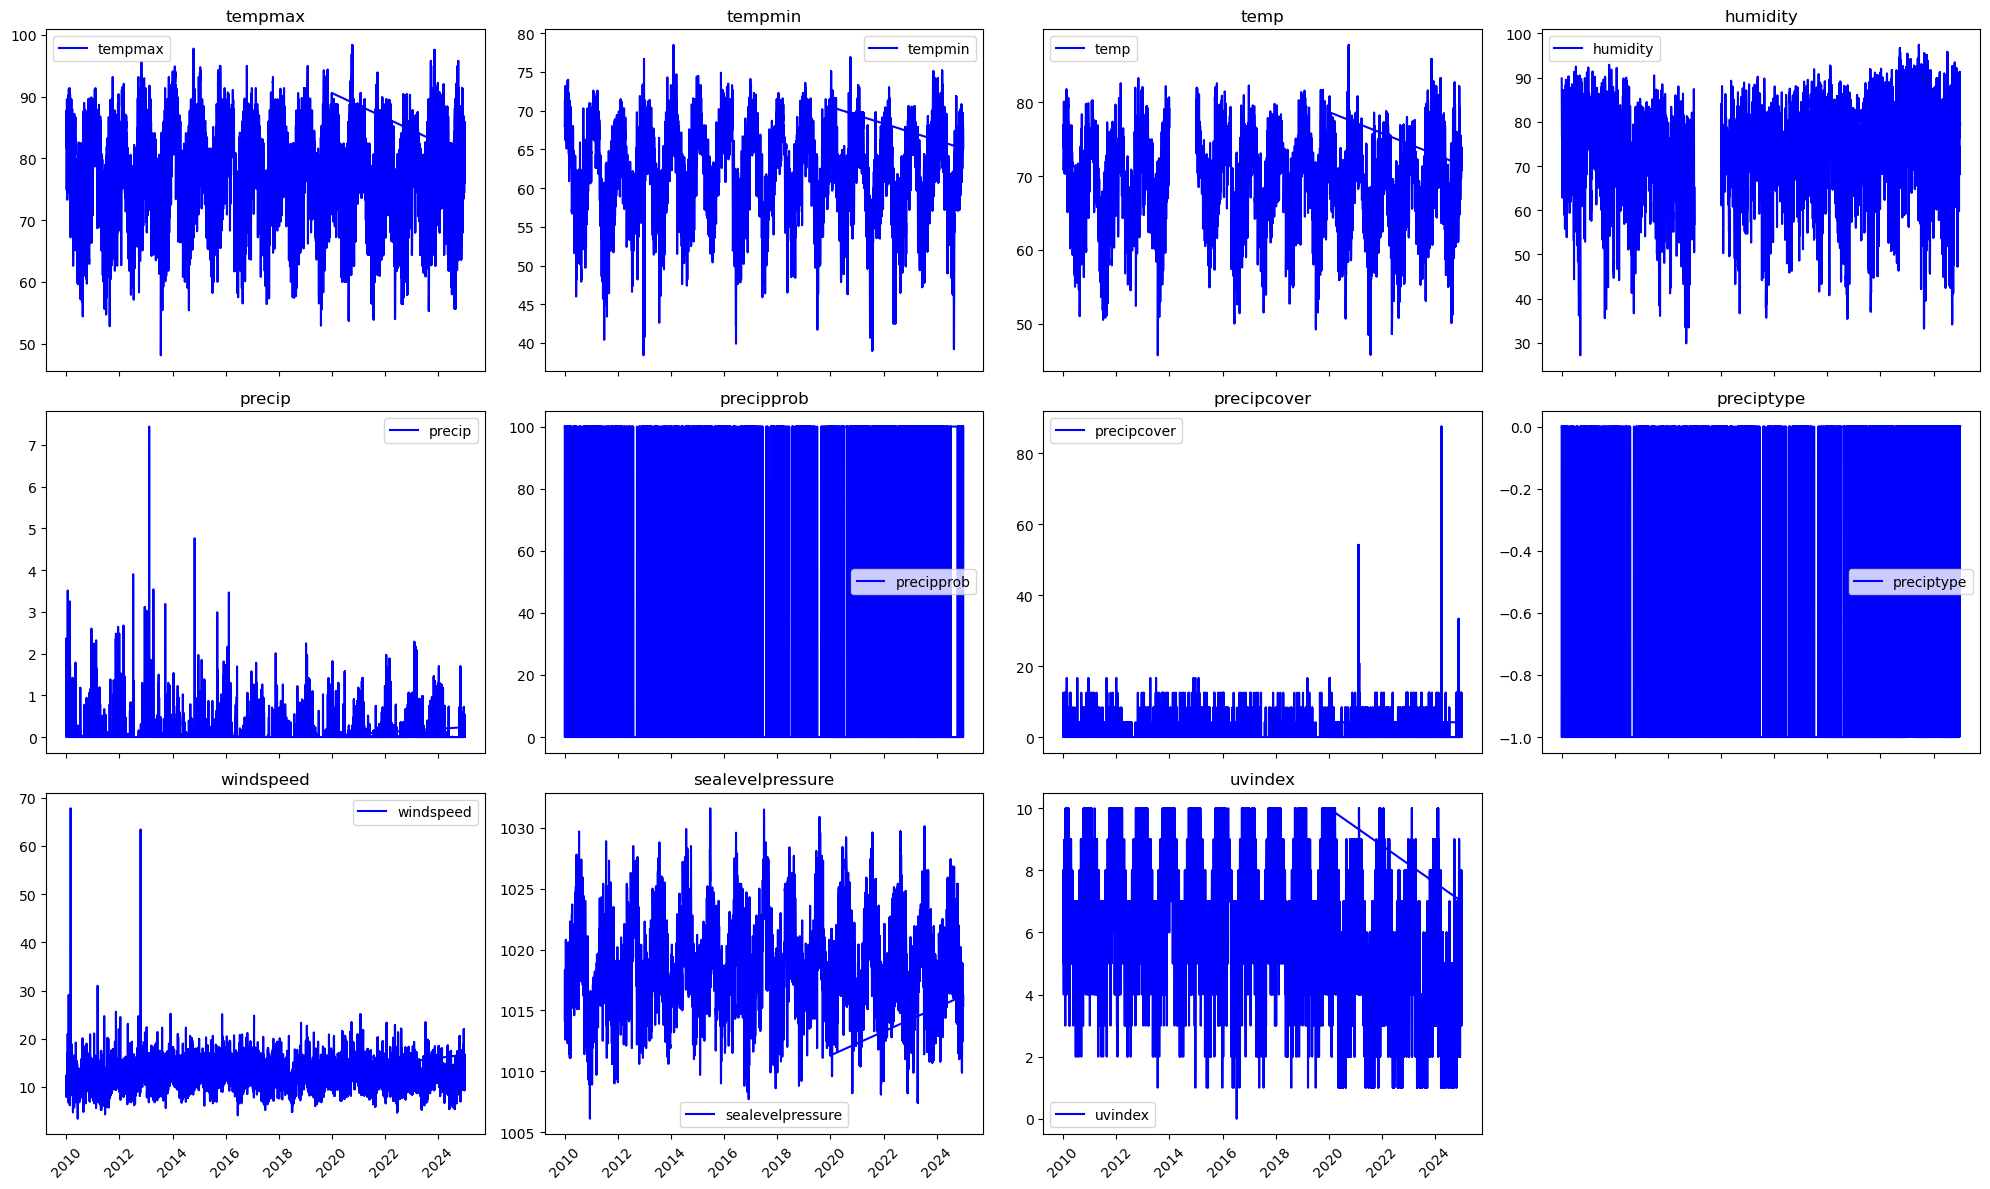

In [5]:
variables = ["tempmax", "tempmin", "temp", "humidity", "precip", "precipprob", 
             "precipcover", "preciptype", "windspeed", "sealevelpressure", "uvindex"]

n_vars = len(variables)
n_cols = 4
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), sharex=True)
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    
    if var == "preciptype":
        if not pd.api.types.is_numeric_dtype(merged_all[var]):
            merged_all[var] = merged_all[var].astype("category").cat.codes
    
    # Plot the variable over time.
    ax.plot(merged_all["datetime"], merged_all[var], label=var, color="blue")
    ax.set_title(var)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = merged_all.drop(columns=["datetime", "name"])
df = df.dropna(subset=("temp", "humidity", "precip", "precipprob", "precipcover", "windspeed", "sealevelpressure", "uvindex"))

if df["preciptype"].dtype == "object":
    df["preciptype"] = df["preciptype"].astype("category").cat.codes

features = [col for col in df.columns if col != "temp"]
target = "temp"

X = df[features]
y = df[target]

X = X.fillna(X.median())
y = y.fillna(y.median())

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model.
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Absolute Error: 0.5000387832699649
R-squared: 0.9855500016019472


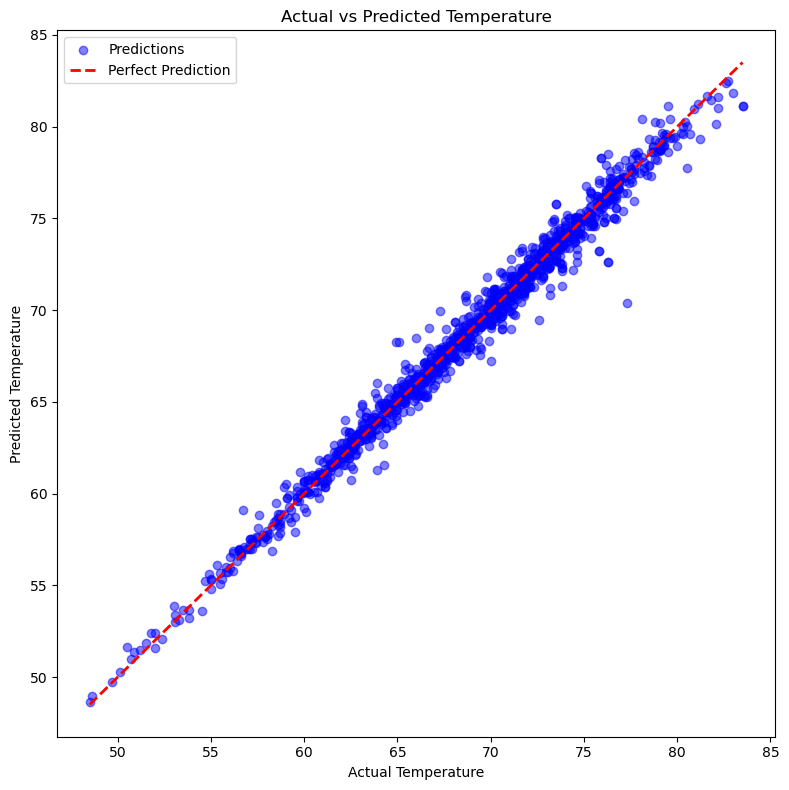

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")

# Plot a 45-degree line for reference (perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Prediction")

plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = merged_all.drop(columns=["datetime", "name"])
df = df.dropna(subset=("temp", "humidity", "precip", "precipprob", "precipcover", "windspeed", "sealevelpressure", "uvindex"))

if df["preciptype"].dtype == "object":
    df["preciptype"] = df["preciptype"].astype("category").cat.codes

features = [col for col in df.columns if col != "temp"]
target = "temp"

X = df[features]
y = df[target]

X = X.fillna(X.median())
y = y.fillna(y.median())

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

merged_df = pd.read_csv("data/merged_weather.csv")
merged_df["datetime"] = pd.to_datetime(merged_all["datetime"])
merged_df.head()
df = merged_all.drop(columns=["datetime", "name"])
df = df.dropna(subset=("humidity"))

if df["preciptype"].dtype == "object":
    df["preciptype"] = df["preciptype"].astype("category").cat.codes

if merged_df["preciptype"].dtype == "object":
    merged_df["preciptype"] = merged_df["preciptype"].astype("category").cat.codes

mask_missing = merged_df["temp"].isna()

features = [col for col in df.columns if col != "temp"]

X_missing = merged_df.loc[mask_missing, features].copy()

training_medians = X.median()
X_missing = X_missing.fillna(training_medians)

# Predict the missing temperature values using your trained model
predicted_temp = model.predict(X_missing)

# Fill the missing temp values in merged_df with the predicted values
merged_df.loc[mask_missing, "temp"] = predicted_temp

# Display the updated DataFrame
merged_df.to_csv("data/merged_weather.csv", index=False)
print(merged_df.head())


    datetime  tempmax  tempmin  temp  humidity  precip  precipprob  \
0 2010-01-01     75.0     68.0  70.9      89.8   0.157         100   
1 2010-01-02     82.2     68.0  72.4      88.6   2.363         100   
2 2010-01-03     84.6     71.3  76.1      81.0   0.000           0   
3 2010-01-04     87.7     71.2  75.9      77.7   0.780         100   
4 2010-01-05     87.8     69.8  77.0      76.6   0.709         100   

   precipcover  preciptype  windspeed  sealevelpressure  uvindex       name  
0         8.33           0       10.8            1014.2      8.0  sao paulo  
1        12.50           0        7.9            1016.4      8.0  sao paulo  
2         0.00          -1       12.4            1018.3      8.0  sao paulo  
3         8.33           0       12.4            1018.1      5.0  sao paulo  
4         4.17           0       11.2            1015.0      6.0  sao paulo  


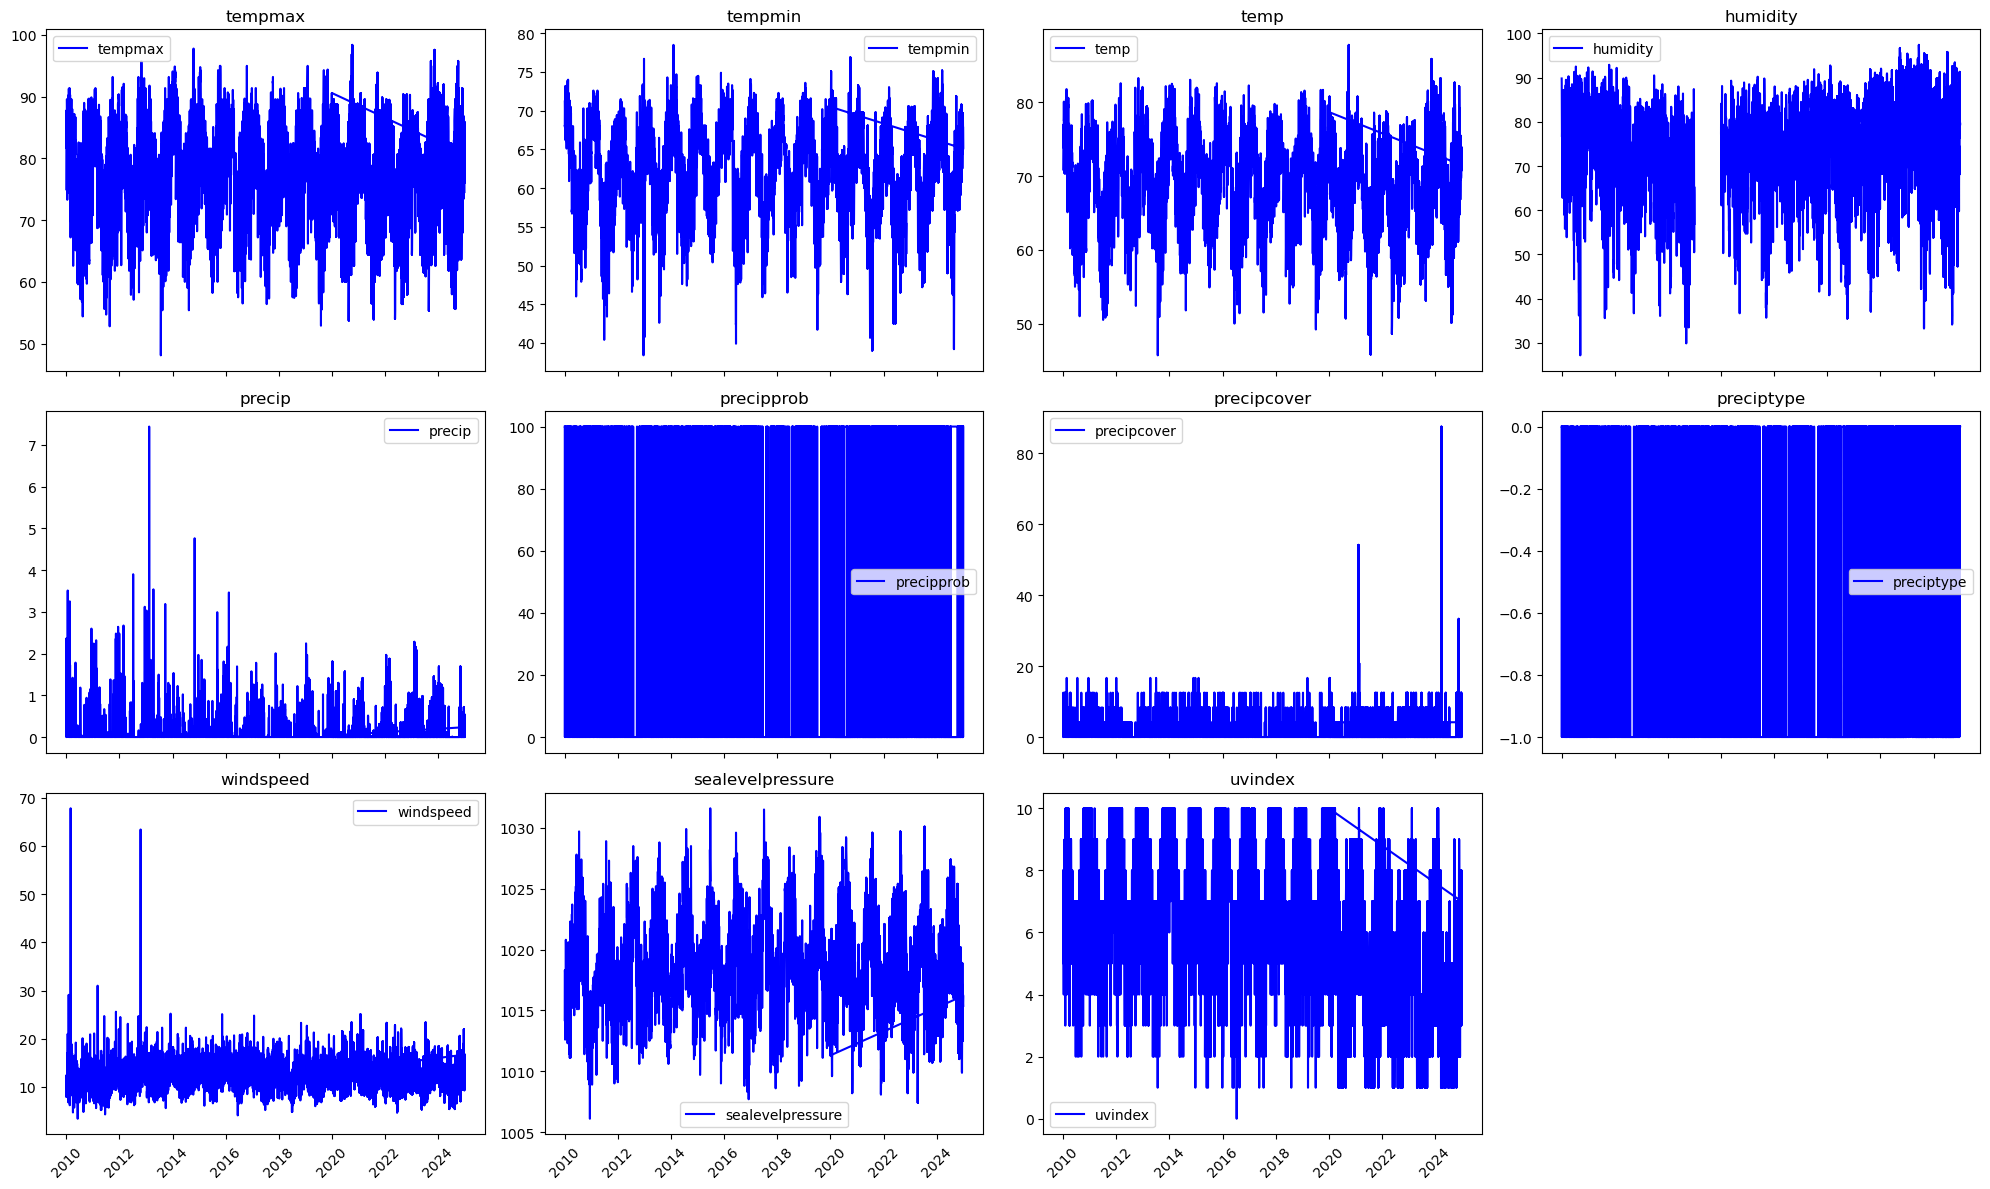

In [9]:
variables = ["tempmax", "tempmin", "temp", "humidity", "precip", "precipprob", 
             "precipcover", "preciptype", "windspeed", "sealevelpressure", "uvindex"]

n_vars = len(variables)
n_cols = 4
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), sharex=True)
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    
    if var == "preciptype":
        if not pd.api.types.is_numeric_dtype(merged_df[var]):
            merged_df[var] = merged_df[var].astype("category").cat.codes
    
    # Plot the variable over time.
    ax.plot(merged_df["datetime"], merged_df[var], label=var, color="blue")
    ax.set_title(var)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = merged_all.drop(columns=["datetime", "name"])
df = df.dropna(subset=("temp", "humidity", "precip", "precipprob", "precipcover", "windspeed", "sealevelpressure", "uvindex"))

if df["preciptype"].dtype == "object":
    df["preciptype"] = df["preciptype"].astype("category").cat.codes

features = [col for col in df.columns if col != "humidity"]
target = "humidity"

X = df[features]
y = df[target]

X = X.fillna(X.median())
y = y.fillna(y.median())

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Increase model complexity with modified hyperparameters
model = RandomForestRegressor(
    n_estimators=300,    # Increase the number of trees
    max_depth=20,        # Increase maximum depth of the trees
    min_samples_split=2, # Lower the minimum samples required to split an internal node
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred = model.predict(X_test)

# Evaluate the model.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Absolute Error: 2.9018687032981396
R-squared: 0.8337384453225838


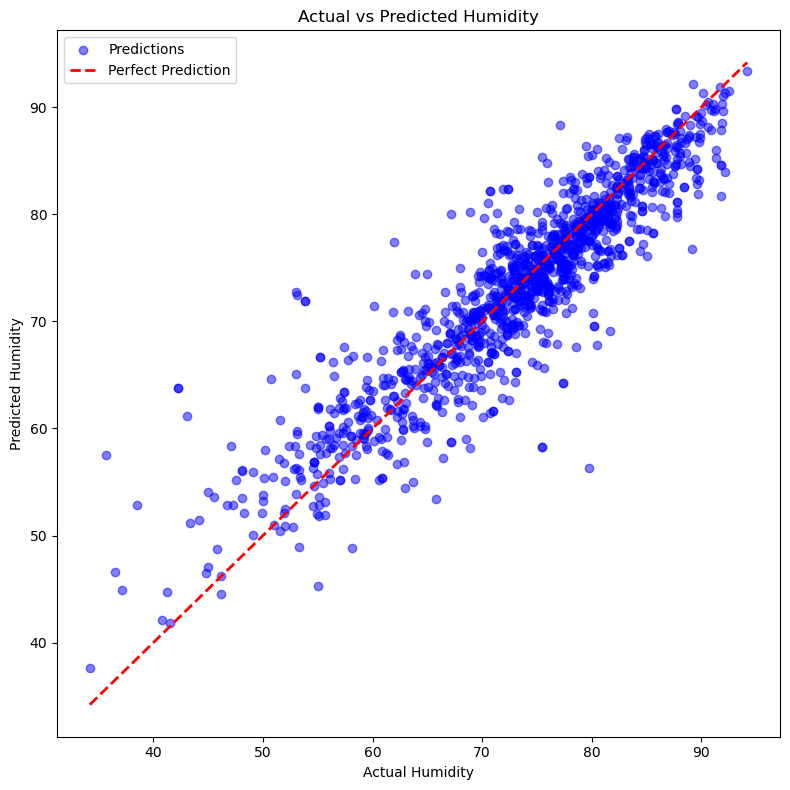

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")

# Plot a 45-degree line for reference (perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Perfect Prediction")

plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Actual vs Predicted Humidity")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

df = merged_all.drop(columns=["datetime", "name"])
df = df.dropna(subset=("temp", "humidity", "precip", "precipprob", "precipcover", "windspeed", "sealevelpressure", "uvindex"))

if df["preciptype"].dtype == "object":
    df["preciptype"] = df["preciptype"].astype("category").cat.codes

features = [col for col in df.columns if col != "humidity"]
target = "humidity"

X = df[features]
y = df[target]

X = X.fillna(X.median())
y = y.fillna(y.median())

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

merged_df = pd.read_csv("data/merged_weather.csv")
merged_df["datetime"] = pd.to_datetime(merged_all["datetime"])
merged_df.head()
df = merged_all.drop(columns=["datetime", "name"])

if df["preciptype"].dtype == "object":
    df["preciptype"] = df["preciptype"].astype("category").cat.codes

mask_missing = merged_df["humidity"].isna()

features = [col for col in df.columns if col != "humidity"]

X_missing = merged_df.loc[mask_missing, features].copy()

training_medians = X.median()
X_missing = X_missing.fillna(training_medians)

# Predict the missing temperature values using your trained model
predicted_humidity = model.predict(X_missing)

# Fill the missing temp values in merged_df with the predicted values
merged_df.loc[mask_missing, "humidity"] = predicted_humidity

# Display the updated DataFrame
merged_df.to_csv("data/merged_weather.csv", index=False)
print(merged_df.head())

    datetime  tempmax  tempmin  temp  humidity  precip  precipprob  \
0 2010-01-01     75.0     68.0  70.9      89.8   0.157         100   
1 2010-01-02     82.2     68.0  72.4      88.6   2.363         100   
2 2010-01-03     84.6     71.3  76.1      81.0   0.000           0   
3 2010-01-04     87.7     71.2  75.9      77.7   0.780         100   
4 2010-01-05     87.8     69.8  77.0      76.6   0.709         100   

   precipcover  preciptype  windspeed  sealevelpressure  uvindex       name  
0         8.33           0       10.8            1014.2      8.0  sao paulo  
1        12.50           0        7.9            1016.4      8.0  sao paulo  
2         0.00          -1       12.4            1018.3      8.0  sao paulo  
3         8.33           0       12.4            1018.1      5.0  sao paulo  
4         4.17           0       11.2            1015.0      6.0  sao paulo  


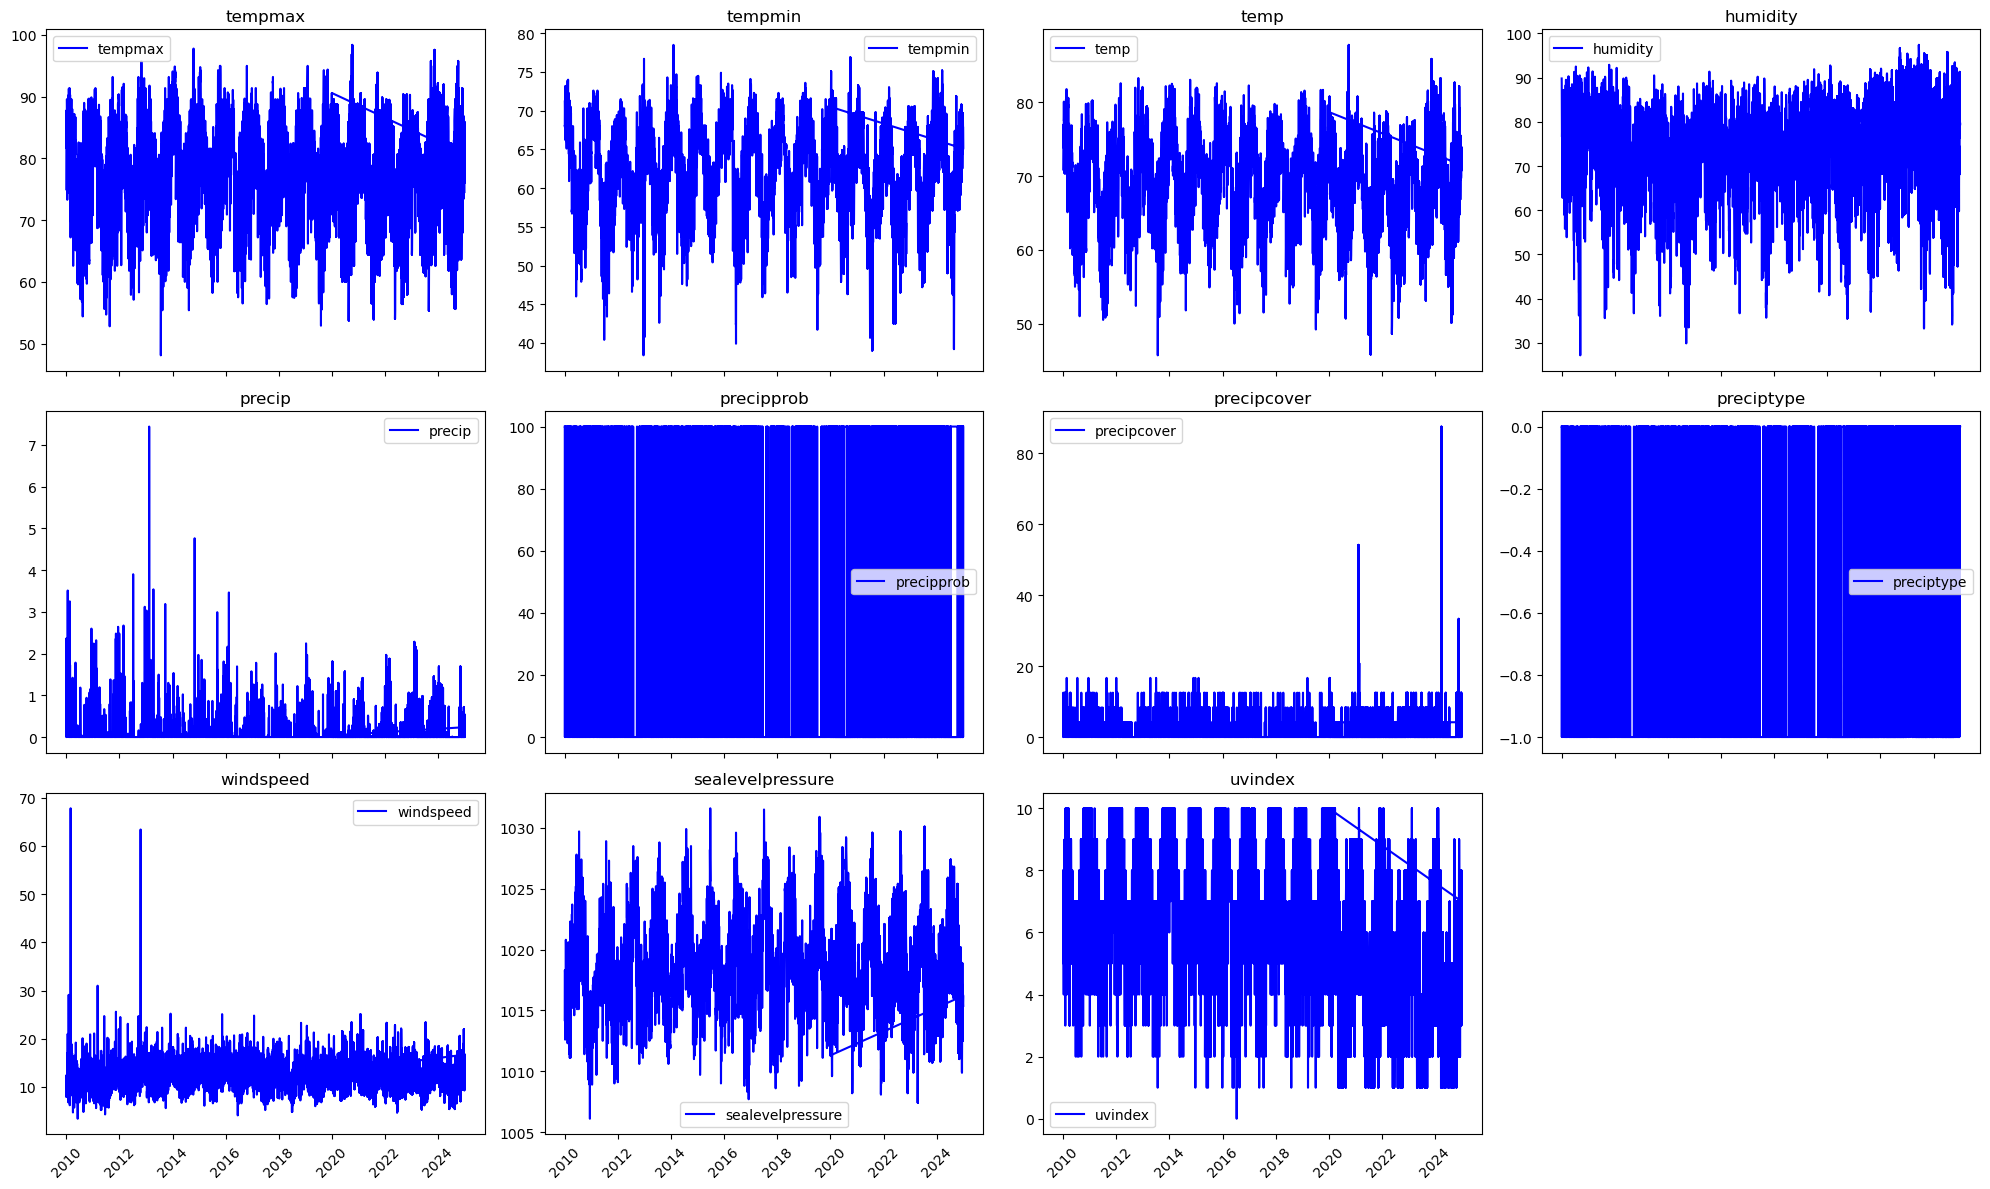

In [13]:
variables = ["tempmax", "tempmin", "temp", "humidity", "precip", "precipprob", 
             "precipcover", "preciptype", "windspeed", "sealevelpressure", "uvindex"]

n_vars = len(variables)
n_cols = 4
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), sharex=True)
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    
    if var == "preciptype":
        if not pd.api.types.is_numeric_dtype(merged_df[var]):
            merged_df[var] = merged_df[var].astype("category").cat.codes
    
    # Plot the variable over time.
    ax.plot(merged_df["datetime"], merged_df[var], label=var, color="blue")
    ax.set_title(var)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


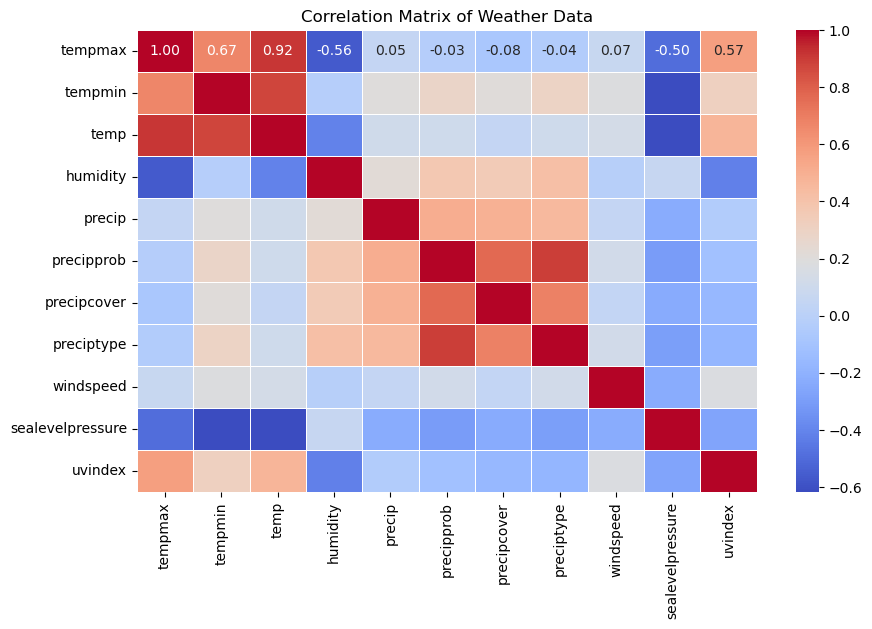

In [14]:
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/merged_weather.csv")

# Drop non-numeric columns
df_numeric = df.drop(columns=["datetime", "name"], errors="ignore")

# Convert temperature and other numeric values to float (if needed)
df_numeric = df_numeric.apply(pd.to_numeric, errors="coerce")

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Weather Data")
plt.show()

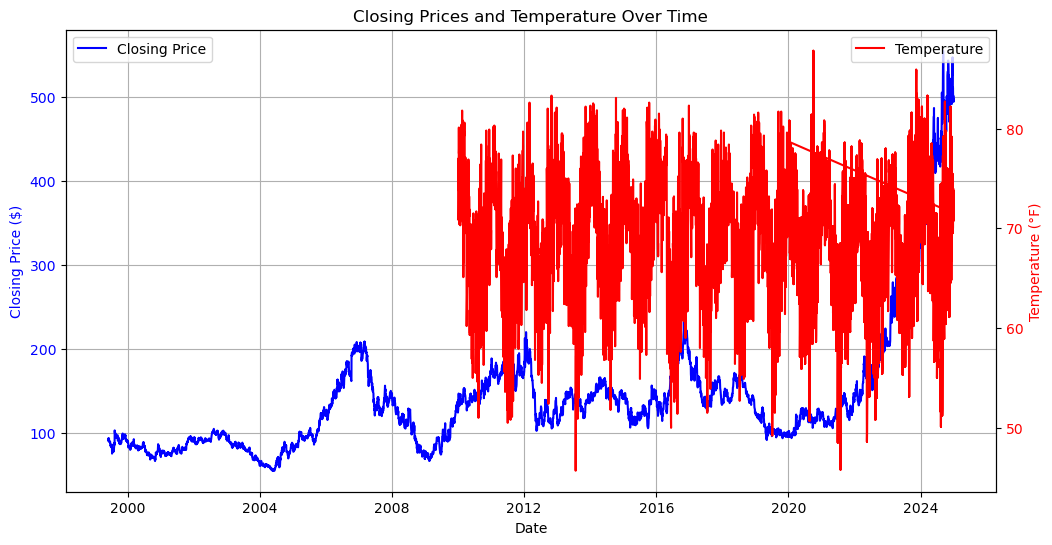

In [18]:
df_finance = pd.read_csv("data/FCOJ_Historical_Prices_Cleaned.csv")

# Convert DATE to datetime format
df_finance["DATE"] = pd.to_datetime(df_finance["DATE"])

# Load weather dataset
df_weather = pd.read_csv("data/merged_weather.csv")

# Convert datetime to pandas datetime format
df_weather["datetime"] = pd.to_datetime(df_weather["datetime"])

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot financial closing prices (left y-axis)
ax1.plot(df_finance["DATE"], df_finance["CLOSE.NEARBY"], color="blue", label="Closing Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Closing Price ($)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.legend(loc="upper left")
ax1.grid(True)

# Create secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(df_weather["datetime"], df_weather["temp"], color="red", label="Temperature")
ax2.set_ylabel("Temperature (°F)", color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.legend(loc="upper right")

# Title
plt.title("Closing Prices and Temperature Over Time")

# Show the plot
plt.show()

In [16]:
# Load financial dataset
df_finance = pd.read_csv("data/FCOJ_Historical_Prices_Cleaned.csv")
df_finance["DATE"] = pd.to_datetime(df_finance["DATE"])  # Convert to datetime
# df_finance.head()

# Load weather dataset
df_weather = pd.read_csv("data/merged_weather.csv")
df_weather["datetime"] = pd.to_datetime(df_weather["datetime"])  # Convert to datetime

# Merge datasets on date
df_merged = pd.merge(df_finance, df_weather, left_on="DATE", right_on="datetime")
df_merged = df_merged.sort_values(by="DATE")  # Ensure sorted order

# Create the residual price column
df_merged["Next_Close"] = df_merged["CLOSE.NEARBY"].shift(-1)  # Next day's closing price
df_merged["Residual"] = df_merged["Next_Close"] - df_merged["CLOSE.NEARBY"]  # Residual price
df_merged.drop(columns=["Next_Close"], inplace=True)  # Clean up
df_merged.to_csv("data/merged_weather_finance.csv", index=False)

df_merged.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,5171,2018-10-22 23:28:31.931928064,2010-01-04 00:00:00,2015-02-19 12:00:00,2020-01-17 00:00:00,2022-07-01 00:00:00,2024-12-31 00:00:00,NaN
CONTRACT (YYYY/MM).NEARBY,5171.0,201851.07194,201001.0,201503.0,202003.0,202207.0,202501.0,436.319643
HIGH.NEARBY,4945.0,182.76998,0.0,123.95,146.5,192.25,589.0,107.534104
LOW.NEARBY,4945.0,177.659585,0.0,120.15,142.9,186.15,575.0,104.146369
CLOSE.NEARBY,5171.0,186.517627,91.25,123.575,146.0,191.8,555.5,101.834423
CONTRACT (YYYY/MM).2,5171.0,201867.486173,201003.0,201505.0,202005.0,202209.0,202503.0,437.065
HIGH.2,5109.0,184.473371,0.0,126.0,147.0,188.0,543.15,98.396083
LOW.2,5109.0,179.576238,0.0,122.6,143.65,181.5,524.25,95.40399
CLOSE.2,5171.0,183.600706,90.9,124.6,145.75,186.575,539.45,96.514198
CONTRACT (YYYY/MM).3,5171.0,201884.325856,201005.0,201507.0,202007.0,202211.0,202505.0,437.35862


In [17]:
# use previous day's price to predict next day's price
# use two month windows to predict the next day


